In [1]:
import pandas as pd
import sklearn
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import os

In [2]:
folderpath = "C:/Users/jO/Desktop/DH_MA_Arbeit/coding/all_goldsamps/"

dataframes = []

for filename in os.listdir(folderpath):
        if filename.endswith('.csv') and filename.startswith("goldsamp"):
            file_path = os.path.join(folderpath, filename)
            df = pd.read_csv(file_path, sep=";", encoding='utf-8')
            dataframes.append(df)
concatenated_df = pd.concat(dataframes, ignore_index=True)
output_file_path = os.path.join(folderpath, "all_goldsamps_concatenated.csv")
concatenated_df.to_csv(output_file_path, index=False, sep=';')

In [3]:
def confusion(folderpath):
    dataframes = []
    
    for filename in os.listdir(folderpath):
    
        if filename.endswith('.csv') and filename.startswith("all_goldsamps"):
            file_path = os.path.join(folderpath, filename)
            csvname = "all_goldsamples"
            csvdf = csvname
            csvdf = pd.read_csv(file_path, sep=";", encoding='utf-8')
            
            actual = csvdf["pos_na"].astype(str)
            predicted = csvdf["pos"].astype(str)
    
            actual_labels = actual.unique()
            predicted_labels = predicted.unique()
            all_labels = sorted(list(set(actual_labels) | set(predicted_labels)))
    
            cmname = f"{csvname}_cm"
            
            cmname = metrics.confusion_matrix(actual, predicted, labels=all_labels)
    
            accuracy = metrics.accuracy_score(actual, predicted)
            overall_precision = metrics.precision_score(actual, predicted, average='micro')
            overall_recall = metrics.recall_score(actual, predicted, average='micro')
            overall_f1_score = metrics.f1_score(actual, predicted, average='micro')

            precision_per_class = metrics.precision_score(actual, predicted, average=None)
            recall_per_class = metrics.recall_score(actual, predicted, average=None)
            f1_score_per_class = metrics.f1_score(actual, predicted, average=None)
            
            cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmname, display_labels=all_labels)
            cm_display.plot(xticks_rotation=45)
            plt.title(f'{csvname} confusion matrix')
            plt.show()
            print(f"accuracy: {accuracy} - overall precision: {overall_precision} - overall recall: {overall_recall} - overall f1-score: {overall_f1_score}")
            for label, precision, recall, f1 in zip(all_labels, precision_per_class, recall_per_class, f1_score_per_class):
                print(f"Metrics for class {label}:")
                print(f"Precision: {precision}")
                print(f"Recall: {recall}")
                print(f"F1-score: {f1}")
                print()

C:\Users\jO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


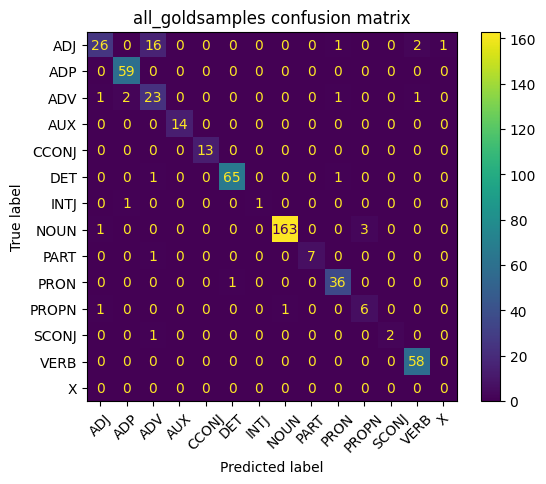

accuracy: 0.9274509803921569 - overall precision: 0.9274509803921569 - overall recall: 0.9274509803921569 - overall f1-score: 0.9274509803921569
Metrics for class ADJ:
Precision: 0.896551724137931
Recall: 0.5652173913043478
F1-score: 0.6933333333333334

Metrics for class ADP:
Precision: 0.9516129032258065
Recall: 1.0
F1-score: 0.9752066115702479

Metrics for class ADV:
Precision: 0.5476190476190477
Recall: 0.8214285714285714
F1-score: 0.6571428571428571

Metrics for class AUX:
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Metrics for class CCONJ:
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Metrics for class DET:
Precision: 0.9848484848484849
Recall: 0.9701492537313433
F1-score: 0.9774436090225563

Metrics for class INTJ:
Precision: 1.0
Recall: 0.5
F1-score: 0.6666666666666666

Metrics for class NOUN:
Precision: 0.9939024390243902
Recall: 0.9760479041916168
F1-score: 0.9848942598187311

Metrics for class PART:
Precision: 1.0
Recall: 0.875
F1-score: 0.9333333333333333

Metrics for class PRON:


In [5]:
poem = "all goldsamples"

confusion(folderpath)